<a href="https://colab.research.google.com/github/ashahdeen/MAIZE-CROP-DISEASE-IMAGE-CLASSIFICATION/blob/dev-branch/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#loading libraries.
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#keras libraries
import keras
import tensorflow.keras as K
#libraries for loading images
from pathlib import Path
import pathlib
import PIL
import PIL.Image

import cv2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
#from keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_inpu

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Getting the directory to the train,validation and test data
train_path = '/content/drive/MyDrive/MOG/DATA/Datasets/Augment Images/train'

(x_train,y_test),(x_test,y_test) = ImageDataGenerator(tf.keras.flow_from_directory(train_path))

In [ ]:
#Getting the directory to the train,validation and test data
train_path = '/content/drive/MyDrive/MOG/DATA/Datasets/Augment Images/train'
valid_path = '/content/drive/MyDrive/MOG/DATA/Datasets/Augment Images/valid'
test_path = '/content/drive/MyDrive/MOG/DATA/Datasets/Augment Images/test'


#Preprocessing the data for MobileNet architecture

#Train data
# train_batches = ImageDataGenerator(preprocessing_function= tf.keras.preprocessing.image_dataset_from_directory(
#     directory=train_path, image_size=(224,224), batch_size=10))

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  image_size=(224,224),
  batch_size=10)

#Validation data
# valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.preprocessing.image_dataset_from_directory(
#     directory=valid_path, image_size=(224,224), batch_size=10))
#validation set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  valid_path,
  image_size=(224,224),
  batch_size=10)

#Test data
test_batches = ImageDataGenerator(preprocessing_function= tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_path, image_size=(224,224), batch_size=10, shuffle=False))

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_path,
  image_size=(224,224),
  batch_size=10)

Found 3000 files belonging to 6 classes.
Found 660 files belonging to 6 classes.
Found 180 files belonging to 6 classes.
Found 180 files belonging to 6 classes.


In [ ]:
%%capture
!pip install wandb

In [ ]:
import wandb

In [ ]:
wandb.login()

wandb: Currently logged in as: mo_g (use `wandb login --relogin` to force relogin)


True

In [ ]:
# # ##
# image_size=(224,224)
# IMG_SHAPE = image_size + (3,)
# base_model = tf.keras.applications.ResNet50(weights = 'imagenet',
#                                              include_top = False,
#                                              input_shape = IMG_SHAPE)

# #adding the top
# x = layers.Flatten()(base_model.output)
# x = layers.Dense(1000, activation='relu')(x)
# predictions = layers.Dense(6, activation = 'softmax')(x)

# model = Model(inputs=base_model.input, outputs=predictions)

# #freezing the layer.
# for layer in base_model.layers:
#   layer.trainable = False

# #initializing our project with wandb.
# run = wandb.init(project='maize-image-classification',save_code=True,name='ResNet50',
#                  config={  # and include hyperparameters and metadata
#                      "learning_rate": 0.0001,
#                      "epochs": 20,
#                      "batch_size": 32,
#                      "loss_function": "categorical_crossentropy",
#                      "architecture": "CNN four layers",
#                      "dataset": "maize-images"
#                  })
# config = wandb.config

# #compiling our model.
# optimizer = tf.keras.optimizers.Adam(config.learning_rate) 
# model.compile(optimizer, config.loss_function, metrics=['acc'])



# #train the model 
# hist= model.fit(train_ds,
#           epochs=config.epochs, 
#           batch_size=config.batch_size,
#           # validation_steps=validation_samples// batch_size,
#           validation_data=(val_ds))


In [ ]:
# # Creating plots of loss and accuracy on the training and validation sets.
# acc = hist.history['acc']
# val_acc = hist.history['val_acc']

# loss = hist.history['loss']
# val_loss = hist.history['val_loss']

# epochs_range = range(config.epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

###Resnet another way.

In [ ]:
#loading the Resnet50 model.
r_model = tf.keras.applications.ResNet50(weights="imagenet")

#summary of the model
r_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:

#adding the top
x = layers.Flatten()(r_model.output)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(6, activation = 'softmax')(x)

model = Model(inputs=r_model.input, outputs=predictions)

In [ ]:
#freezing the layer.
for layer in r_model.layers:
  layer.trainable = False

In [ ]:
#initializing our project with wandb.
run = wandb.init(project='maize-image-classification',save_code=True,name='ResNet50 another way',
                 config={  # and include hyperparameters and metadata
                     "learning_rate": 0.0001,
                     "epochs": 10,
                     "batch_size": 32,
                     "loss_function": "sparse_categorical_crossentropy",
                     "architecture": "CNN four layers",
                     "dataset": "maize-images"
                 })
config = wandb.config

In [ ]:
# import wandcallback 
from wandb.keras import WandbCallback

In [ ]:
#complining the model
optimizer = tf.keras.optimizers.Adam(config.learning_rate) 
model.compile(optimizer, config.loss_function, metrics=['acc'])

history= model.fit(train_ds,
          epochs=config.epochs, 
          batch_size=config.batch_size,
          validation_data=(val_ds))
         


Epoch 1/10
300/300 [==============================] - 627s 2s/step - loss: 1.7406 - acc: 0.5560 - val_loss: 1.6801 - val_acc: 0.6182
Epoch 2/10
300/300 [==============================] - 619s 2s/step - loss: 1.5833 - acc: 0.6393 - val_loss: 1.4818 - val_acc: 0.6394
Epoch 3/10
300/300 [==============================] - 609s 2s/step - loss: 1.3613 - acc: 0.6530 - val_loss: 1.2680 - val_acc: 0.6652
Epoch 4/10
300/300 [==============================] - 614s 2s/step - loss: 1.1695 - acc: 0.6730 - val_loss: 1.1165 - val_acc: 0.6848
Epoch 5/10
300/300 [==============================] - 617s 2s/step - loss: 1.0406 - acc: 0.6893 - val_loss: 1.0179 - val_acc: 0.7091
Epoch 6/10
300/300 [==============================] - 614s 2s/step - loss: 0.9546 - acc: 0.6993 - val_loss: 0.9507 - val_acc: 0.7303
Epoch 7/10
300/300 [==============================] - 618s 2s/step - loss: 0.8927 - acc: 0.7130 - val_loss: 0.9029 - val_acc: 0.7197
Epoch 8/10
300/300 [==============================] - 606s 2s/step - 

In [ ]:
#Saving the model
import tensorflow as tf

from keras.models import load_model

model.save('Image_classification_ResNet_model')

INFO:tensorflow:Assets written to: Image_classification_ResNet_model/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


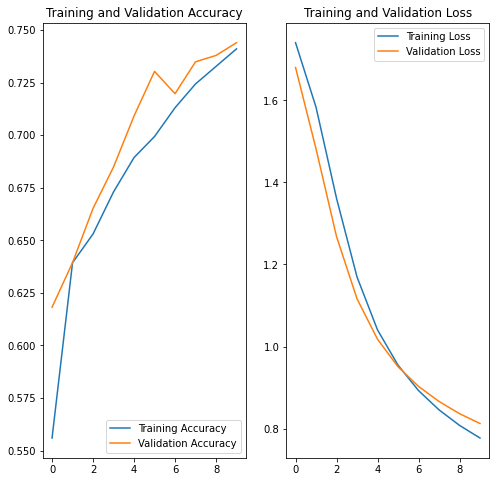

In [ ]:
# Creating plots of loss and accuracy on the training and validation sets.
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(config.epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
Y_pred = model.predict_generator(test_ds)
y_pred = np.argmax(Y_pred, axis=1)
# print('Confusion Matrix')
# print(confusion_matrix(val_ds.classes, y_pred))
# print('Classification Report')
# target_names = ['Cats', 'Dogs', 'Horse']
# print(classification_report(val_ds.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
import tensorflow as tf
predicted_categories  = y_pred#= np.argmax(y_pred, axis=1)

In [ ]:
predicted_categories

array([1, 1, 3, 5, 5, 0, 2, 0, 3, 0, 3, 2, 2, 2, 3, 5, 0, 1, 1, 5, 4, 5,
       5, 5, 2, 4, 3, 4, 4, 5, 2, 3, 5, 2, 0, 2, 5, 3, 1, 2, 4, 4, 5, 1,
       3, 3, 0, 2, 2, 1, 1, 4, 2, 3, 0, 4, 2, 5, 3, 2, 3, 4, 0, 2, 4, 3,
       4, 4, 1, 3, 4, 4, 2, 3, 4, 2, 5, 1, 5, 3, 2, 2, 3, 4, 4, 1, 3, 2,
       0, 4, 2, 4, 2, 0, 1, 5, 3, 0, 0, 1, 4, 5, 3, 5, 3, 5, 0, 3, 1, 1,
       4, 3, 5, 4, 5, 5, 5, 5, 3, 3, 2, 0, 1, 5, 0, 4, 3, 4, 0, 3, 0, 1,
       3, 5, 4, 0, 4, 3, 4, 3, 0, 5, 5, 3, 0, 4, 2, 4, 4, 2, 0, 4, 1, 3,
       1, 2, 2, 4, 4, 2, 2, 3, 4, 3, 5, 1, 3, 0, 0, 0, 1, 4, 2, 2, 2, 3,
       5, 3, 0, 3])

In [ ]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)

In [ ]:
confusion_matrix(predicted_categories, true_categories)

array([[3, 4, 3, 4, 5, 6],
       [5, 3, 4, 4, 2, 3],
       [6, 5, 4, 6, 8, 3],
       [6, 6, 5, 7, 7, 7],
       [6, 4, 7, 6, 3, 9],
       [4, 8, 7, 3, 5, 2]])

In [ ]:
print(classification_report(predicted_categories, true_categories))

              precision    recall  f1-score   support

           0       0.10      0.12      0.11        25
           1       0.10      0.14      0.12        21
           2       0.13      0.12      0.13        32
           3       0.23      0.18      0.21        38
           4       0.10      0.09      0.09        35
           5       0.07      0.07      0.07        29

    accuracy                           0.12       180
   macro avg       0.12      0.12      0.12       180
weighted avg       0.13      0.12      0.12       180



In [ ]:
3+4+3+4+5+6

report = classification_report(predicted_categories, true_categories)
wandb.log({'classification report': report})

In [ ]:
report = classification_report(predicted_categories, true_categories)
wandb.log({'classification report': report})

In [ ]:
conf = confusion_matrix(predicted_categories, true_categories)
wandb.log({'confusion matrix':conf })
model.evaluate(test_ds)

18/18 [==============================] - 30s 2s/step - loss: 0.8932 - acc: 0.6667


[0.8931518793106079, 0.6666666865348816]

## Others

In [ ]:
y_pred=model.predict(x=test_ds, steps=len(test_ds), verbose=0)

In [ ]:
cm = confusion_matrix(test_ds.class_names.reshape(-1,1), y_pred)
# cm = confusion_matrix(y_true=test_labels, y_pred=prediction.argmax(axis=1))
wandb.log({'confusion_matrix':cm})

AttributeError: ignored

In [ ]:
Y_pred_res = model.predict(x=test_ds, steps=len(test_ds), verbose=0)
y_pred_res = np.argmax(Y_pred_res, axis=1)
print('Confusion Matrix')
conf_matrix_res = confusion_matrix(val_ds.classes, y_pred_res)
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['n0','n1','n2','n3','n4','n5','n6','n7','n8','n9']
class_rep_res = classification_report(val_ds.classes, y_pred_res, target_names=target_names)
print(class_rep_res)

In [ ]:

test_labels = test_ds.class_names
prediction = model.predict(x=test_ds, steps=len(test_ds), verbose=0)

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=prediction.argmax(axis=1))
wandb.log({'confusion_matrix':cm})

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

test_batches.class_indices

In [ ]:
cm_plot_labels = ['0','1','2','3','4','5']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
#Classification report
print(classification_report(y_true=test_labels, y_pred=predictions.argmax(axis=1)))


In [ ]:
# Creating plots of loss and accuracy on the training and validation sets.
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(config.epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()